# IMPORTS

In [1]:
#IMPORTS
import pandas_datareader as pdr
import pandas as pd
import datetime as dt
import datetime
from datetime import timedelta 
from datetime import date 
import yfinance as yf   
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
import plotly.graph_objects as go


# DATA SCRAPPING

In [2]:
# ===== FUNCTION THAT OPEN THE BASE WEBPAGE AND LOOKS FOR THE TARGETTED WEBPAGE IN A SIMULATED CHROME WINDOW =====
    #Parameters : no parameters
    #Return : the URL of the targetted webpage
def get_url():
    options = Options()

    driver = webdriver.Chrome(options=options)
    #driver.maximize_window()

    #OPEN FIRST URL AND GET SECOND URL
    driver.get("https://www.cmegroup.com/markets/interest-rates/cme-fedwatch-tool.html?redirect=/trading/interest-rates"
               "/countdown-to-fomc.html")

    #driver.implicitly_wait(1) # gives an implicit wait for 20 seconds

    #Switch to area cmeIframe-jtxelq2f
    driver.switch_to.frame(driver.find_element(By.ID, "cmeIframe-jtxelq2f"))

    #Find the element Form1 -> correspond to the Quickstrike window integrated to the website
    folder = driver.find_element(By.ID, "Form1")

    #Get the URL of the targetted QuickStrike table
    URL = folder.get_property('action')
    return URL

# ===== FUNCTION THAT SCRAPS THE DATA FROM THE WEBPAGE OF THE TARGETTED URL =====
    #Parameters : no parameters
    #Return : a dataframe of the targetted table of the targetted URL
def get_meeting_dates():
    options = Options()

    URL = get_url()
    # print(URL)

    #CREATE SECOND DRIVER TO OPEN SECOND URL AND CLICK BUTTON 
    driver_Click = webdriver.Chrome(options=options)

    #driver_Click.maximize_window()

    #Open a new window with the taragetted QuickStrike URL we juste get from the previous get_url function 
    driver_Click.get(URL)
    
    #Click on the "Probabilities" component which ID is "ctl00_MainContent_ucViewControl_IntegratedFedWatchTool_lbPTree"
    folder_Click = driver_Click.find_element(By.ID, "ctl00_MainContent_ucViewControl_IntegratedFedWatchTool_lbPTree")
    folder_Click.click()

    #Gives an implicit wait for 5 seconds so that the QuickStrike table can load
    driver_Click.implicitly_wait(1) 

    df = pd.DataFrame()

    #Get data from the QuickStrike table and stores it in the df
    for i in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:

        ligne_selectionnee = "ligne" + str(i)
        current_xpath = "/html[1]/body[1]/form[1]/div[3]/div[2]/div[3]/div[1]/div[1]/div[1]/div[1]/div[1]/div[3]/div[3]/div[1]/div[1]/table[2]/tbody[1]/tr[" + str(i) + "]"
        ligne_selectionnee = driver_Click.find_element(By.XPATH, current_xpath).text

        current_df=pd.DataFrame({ligne_selectionnee})
        
        # df.append(current_df, ignore_index=True)

        df = pd.concat([df, current_df], ignore_index=True)
    
    return df

#Récuperer l'URL et l'afficher
# URL = get_url()

raw_data_from_website_df  = get_meeting_dates()

scrapped_data_from_website_df = raw_data_from_website_df

print(scrapped_data_from_website_df.iloc[0,0], "\n") #OUTPUT : MEETING DATE 350-375 375-400 400-425 425-450 450-475 475-500 500-525 525-550 550-575 575-600


scrapped_data_from_website_df #OUTPUT : 
# 0	MEETING DATE 350-375 375-400 400-425 425-450 4...
# 1	13/12/2023 0,0% 0,0% 0,0% 0,0% 0,0% 95,5% 4,5%...
# 2	31/01/2024 0,0% 0,0% 0,0% 0,0% 0,0% 0,0% 0,0% ...
# 3	20/03/2024 0,0% 0,0% 0,0% 0,0% 0,0% 0,0% 21,0%...
# 4	01/05/2024 0,0% 0,0% 0,0% 0,0% 0,0% 8,1% 39,7%...
# 5	12/06/2024 0,0% 0,0% 0,0% 0,0% 4,0% 23,8% 43,0...
# 6	31/07/2024 0,0% 0,0% 0,0% 2,2% 14,7% 34,1% 33,...
# 7	18/09/2024 0,0% 0,0% 1,3% 9,7% 26,3% 34,0% 21,...
# 8	07/11/2024 0,0% 0,7% 5,7% 18,4% 30,4% 27,6% 13...

MEETING DATE 350-375 375-400 400-425 425-450 450-475 475-500 500-525 525-550 550-575 575-600 



,0
0,MEETING DATE 350-375 375-400 400-425 425-450 4...
1,"13/12/2023 0,0% 0,0% 0,0% 0,0% 0,0% 96,6% 3,4%..."
2,"31/01/2024 0,0% 0,0% 0,0% 0,0% 0,0% 0,0% 0,0% ..."
3,"20/03/2024 0,0% 0,0% 0,0% 0,0% 0,0% 0,0% 23,6%..."
4,"01/05/2024 0,0% 0,0% 0,0% 0,0% 0,0% 10,3% 43,6..."
5,"12/06/2024 0,0% 0,0% 0,0% 0,0% 5,4% 27,8% 42,8..."
6,"31/07/2024 0,0% 0,0% 0,0% 2,9% 17,5% 35,9% 31,..."
7,"18/09/2024 0,0% 0,0% 1,8% 11,9% 28,9% 33,2% 19..."
8,"07/11/2024 0,0% 0,9% 7,0% 20,5% 31,1% 26,0% 11..."
9,"18/12/2024 0,7% 5,2% 16,6% 28,1% 27,5% 15,9% 5..."


# DATA TRANSFORMATION  : TRANSFORM RAW MEETING DATE DATA IN DATAFRAME

In [3]:
#FUNCTION TO TRANSFORM ONE LINE OF THE probabilities_scrapped_raw string in a transposed dataframe
    #Parameters : 
        # - dataheader : the header_scrapped_raw string
        # - data_probabilities : the probabilities_scrapped_raw string
        # - index : a binary index to know if the data is the first one and to add two 0 to counter the default of the initial targetted QuickStrike table
    #Return : the slice dataframe corresponding to a specific date
    #Return example : 
    # Rates Percentage
    # 0  350-375       0,0%
    # 1  375-400       0,0%
    # 2  400-425       0,0%
    # 3  425-450       0,0%
    # 4  450-475       0,0%
    # 5  475-500      95,5%
    # 6  500-525       4,5%
    # 7  525-550       0,0%
    # 8  550-575          0
    # 9  575-600          0
def dataSlicer(data_headers_raw, data_probabilities_raw, index):
    #Split the data into date and percentages
    data_headers_clean = data_headers_raw[0].split(" ")
    date_percentages_clean = data_probabilities_raw[0].split(" ")

    #Extract the date and percentages
    # date = date_percentages_clean[0]
    percentages = date_percentages_clean[1:]

    if (index == 1):
        # percentages.append("0,0%")
        # percentages.append("0,0%")
        percentages.insert(0, "0,0%")
        percentages.insert(0, "0,0%")  
        # percentages.insert(0, "0,0%")
        # percentages.insert(0, "0,0%")  
    
    # Create a DataFrame
    df = pd.DataFrame([percentages], columns=data_headers_clean[1:])
    # df.insert(0, 'Date', date)
    df = df.T
    df = df.reset_index()
    df.columns = ['Rates', 'Percentage']
    return df

# DATA TRANSFORMATION  : GET THE DATE FROM RAW MEETING DATE DATA 

In [4]:
#FUNCTION THAT TAKES A probabilities_scrapped_raw STRING IN PARAMETER AND RETURNS THE DATE OF THIS STRING
    #Parameters : probabilities_scrapped_raw : the probabilities_scrapped_raw string
    #Return example : 13/12/2023
def DataSpliterDate(probabilities_scrapped_raw): # Split the data into date and percentage
    date_probabilities = probabilities_scrapped_raw[0].split(" ")
    # Extract the date
    returned_date = date_probabilities[0]
    return returned_date

# FINAL FUNCTION CALLING OTHER FUNCTION AND MERGING DATA IN A SINGLE DATAFRAME

In [5]:
def dfRatesMerger():

    scrapped_data_from_website_df  = get_meeting_dates()

    Rates_df = pd.DataFrame({"Rates": ["0-25",	"25-50",	"50-75",	"75-100",	"100-125",	"125-150",	"150-175",	"175-200",	"200-225",	"225-250",	"250-275",	"275-300",	"300-325",	"325-350",	"350-375",	"375-400",	"400-425",	"425-450",	"450-475",	"475-500",	"500-525",	"525-550",	"550-575",	"575-600",	"600-625",	"625-650",	"650-675",	"675-700",	"700-725",	"725-750",	"750-775",	"775-800",	"800-825",	"825-850",	"850-875",	"875-900",	"900-925",	"925-950",	"950-975",	"975-1000"]})

    #For each meeting date...
    for i in [9, 8, 7, 6, 5, 4, 3, 2, 1]:

        #Get the raw header
        header_scrapped_raw = scrapped_data_from_website_df.iloc[0,0]
        #Get the raw probabilities
        probabilities_scrapped_raw = scrapped_data_from_website_df.iloc[i,0] 

        #Delete the "MEETING" frome the header of the retrieve table
        header_scrapped_raw = header_scrapped_raw[8:]

        #Retransform the raw probabilities in a clean dataframe
        transformed_dateframe_of_specific_meeting_date = dataSlicer([header_scrapped_raw], [probabilities_scrapped_raw], i) #for loop on 1
        Date_of_specific_meeting_date = DataSpliterDate([probabilities_scrapped_raw])

        #Merge the clean dataframe with the default rate interval
        Rates_df=pd.merge(transformed_dateframe_of_specific_meeting_date,Rates_df, how='right', on='Rates')

        #Format final table
        Rates_df.rename(columns={'Percentage': Date_of_specific_meeting_date}, inplace=True)
        Rates_df = Rates_df.fillna("0,0%")
        
    return Rates_df

final_df = dfRatesMerger()
final_df
final_df.replace('0,0%', 0, inplace=True)
final_df = (final_df.loc[(final_df[[final_df.columns[1]]]!= 0).all(axis=1) | (final_df[[final_df.columns[2]]]!= 0).all(axis=1) | (final_df[[final_df.columns[3]]]!= 0).all(axis=1) | (final_df[[final_df.columns[4]]]!= 0).all(axis=1) | (final_df[[final_df.columns[5]]]!= 0).all(axis=1) | (final_df[[final_df.columns[6]]]!= 0).all(axis=1) | (final_df[[final_df.columns[7]]]!= 0).all(axis=1) | (final_df[[final_df.columns[8]]]!= 0).all(axis=1) | (final_df[[final_df.columns[9]]]!= 0).all(axis=1)]).T

final_df.columns = final_df.iloc[0]
final_df = final_df.iloc[1:] 
final_df 
final_scrapped_df = final_df
final_scrapped_df #dataframe à mettre en BDD

Rates,350-375,375-400,400-425,425-450,450-475,475-500,500-525,525-550,550-575,575-600
13/12/2023,0,0,0,0,0,0,0,"96,6%","3,4%",0
31/01/2024,0,0,0,0,0,0,0,"90,6%","9,1%","0,2%"
20/03/2024,0,0,0,0,0,0,"23,6%","69,5%","6,8%","0,2%"
01/05/2024,0,0,0,0,0,"9,7%","42,4%","43,8%","4,1%","0,1%"
12/06/2024,0,0,0,0,"5,3%","27,7%","43,2%","21,8%","1,9%",0
31/07/2024,0,0,0,"2,9%","17,4%","36,0%","31,7%","11,1%","0,9%",0
18/09/2024,0,0,"1,8%","11,7%","28,8%","33,4%","19,1%","4,9%","0,4%",0
07/11/2024,0,"0,9%","6,6%","20,1%","31,0%","26,4%","12,1%","2,7%","0,2%",0
18/12/2024,"0,6%","5,1%","16,4%","28,1%","27,7%","16,0%","5,2%","0,9%","0,1%",0


# REWORK THE DATAFRAME TO DISPLAY IN ON A GRAPH

In [6]:
dataframe_from_database = final_scrapped_df
def convert_percentage(x):
    if isinstance(x, str):
        value = (x.replace('%', ''))     
        value = value.replace(',', '.')
        return value
    else:
        return x

# final = final.applymap(convert_percentage)

def divide_100(x):
    if isinstance(x, str):
        value = x
        return value
    else:
        return x
    


dataframe_from_database = dataframe_from_database.map(convert_percentage)

dataframe_from_database = dataframe_from_database.map(divide_100)

for col in dataframe_from_database.columns:
    if pd.api.types.is_numeric_dtype(dataframe_from_database[col]):
        continue
    try:
        dataframe_from_database[col] = pd.to_numeric(dataframe_from_database[col])
    except:
        pass

# print("final.columns", dataframe_from_database.columns, "\n")
# print("type(final.columns)", type(dataframe_from_database.columns), "\n")

dataframe_from_database

Rates,350-375,375-400,400-425,425-450,450-475,475-500,500-525,525-550,550-575,575-600
13/12/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.6,3.4,0.0
31/01/2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.6,9.1,0.2
20/03/2024,0.0,0.0,0.0,0.0,0.0,0.0,23.6,69.5,6.8,0.2
01/05/2024,0.0,0.0,0.0,0.0,0.0,9.7,42.4,43.8,4.1,0.1
12/06/2024,0.0,0.0,0.0,0.0,5.3,27.7,43.2,21.8,1.9,0.0
31/07/2024,0.0,0.0,0.0,2.9,17.4,36.0,31.7,11.1,0.9,0.0
18/09/2024,0.0,0.0,1.8,11.7,28.8,33.4,19.1,4.9,0.4,0.0
07/11/2024,0.0,0.9,6.6,20.1,31.0,26.4,12.1,2.7,0.2,0.0
18/12/2024,0.6,5.1,16.4,28.1,27.7,16.0,5.2,0.9,0.1,0.0


In [7]:
# Define the range values
ranges = dataframe_from_database.columns

# Convert each range to its midpoint
midpoints = []
for range_str in ranges:
    # Split the range string into its two values
    values = range_str.split("-")
    start_value = int(values[0])
    end_value = int(values[1])

    # Calculate the midpoint
    midpoint =end_value /100

    # Add the midpoint to the list of midpoints
    midpoints.append(midpoint)

# print(midpoints, "\n")

dataframe_from_database.columns = midpoints

# dataframe_from_database

In [8]:
selected_columns = [dataframe_from_database.columns[0], dataframe_from_database.columns[1], dataframe_from_database.columns[2], dataframe_from_database.columns[3], dataframe_from_database.columns[4], dataframe_from_database.columns[5], dataframe_from_database.columns[6], dataframe_from_database.columns[7], dataframe_from_database.columns[8], dataframe_from_database.columns[9]]

max_values_indices = dataframe_from_database[selected_columns].idxmax(axis=1)

max_values = dataframe_from_database.max(axis=1)

print("max_values", max_values, "\n")

# # Print the indices of the maximum values in each row
max_values_indices

type(max_values_indices)

max_values_indices

df_to_display_in_graph = max_values_indices.to_frame()
df_to_display_in_graph['Probabilities']=(max_values)
# Print the DataFrame
print(df_to_display_in_graph)
df_to_display_in_graph.columns = ['Upper range rate', 'Probabilities']
# df_to_display_in_graph

max_values 13/12/2023    96.6
31/01/2024    90.6
20/03/2024    69.5
01/05/2024    43.8
12/06/2024    43.2
31/07/2024    36.0
18/09/2024    33.4
07/11/2024    31.0
18/12/2024    28.1
dtype: float64 

               0  Probabilities
13/12/2023  5.50           96.6
31/01/2024  5.50           90.6
20/03/2024  5.50           69.5
01/05/2024  5.50           43.8
12/06/2024  5.25           43.2
31/07/2024  5.00           36.0
18/09/2024  5.00           33.4
07/11/2024  4.75           31.0
18/12/2024  4.50           28.1


# DISPLAY THE GRAPH

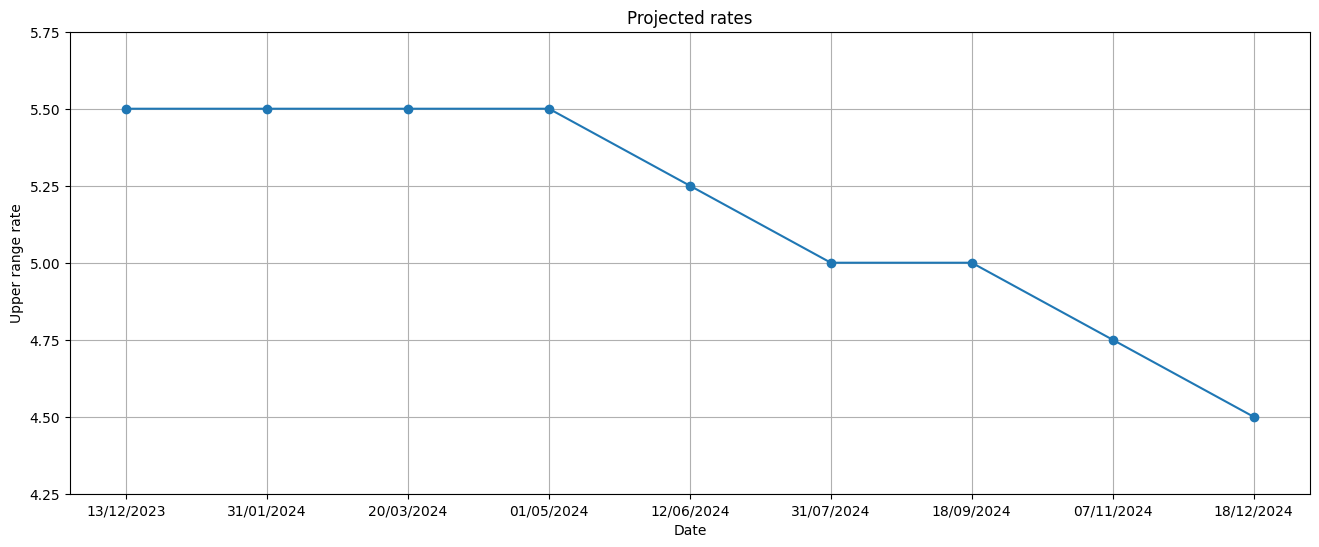

In [9]:
# ===== PYPLOT =====
# Create the line graph
plt.figure(figsize=(16, 6))
plt.plot(df_to_display_in_graph.index, df_to_display_in_graph['Upper range rate'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Upper range rate')
plt.title('Projected rates')
plt.grid(True)

# Scale Y axis by 0.25
def make_increment(start, end, num_steps):
    return [start + i * (end - start) / (num_steps - 1) for i in range(num_steps)]

max_value = df_to_display_in_graph['Upper range rate'].max()
min_value = df_to_display_in_graph['Upper range rate'].min()
increment_values = make_increment(max_value+0.25, min_value-0.25, int((max_value-min_value)/0.25)+3)
plt.gca().set_yticks(increment_values)

plt.show()

In [ ]:
# # ===== PLOTLY =====
# import plotly.graph_objects as go
# reseted_index_df = df.reset_index()
# reseted_index_df.columns = ['Date', 'Upper range rate', 'Probabilities','']
# data_list = reseted_index_df.to_dict('records')
# # Create a list of traces
# traces = []
# for row in data_list:
#     trace = go.Scatter(
#         x=[row['Date']],
#         y=[row['Upper range rate']],
#         name=f"Point {row['Upper range rate']}",
#         hovertext=f"Upper range rate: {row['Upper range rate']}<br>Probability: {row['Probabilities']}",
#         hoverinfo='Detail',
#         # type = 'scatter', 
#         # mode = 'lines',
#     )
#     traces.append(trace)

# # Create the layout
# layout = go.Layout(
#     title='Projected rates',
#     xaxis=dict(title='Date'),
#     yaxis=dict(title='Upper range rate')
# )

# # Add the traces and layout to the figure
# fig = go.Figure(data=traces, layout=layout)

# # Display the figure
# fig.show()